
---

# 🧠 What is **Transfer Learning**?

---

## 👶 Baby-Level Definition

> **Transfer learning** means **taking a model that already knows something**, and **teaching it a new but related task** — much faster and smarter.

Imagine a robot already trained to recognize **cats and dogs**.
Now you want it to recognize **lions and tigers**.

Instead of training a new model from scratch, you say:

> “Hey robot! You already know what fur, tails, and eyes look like — so let’s just tweak the top part for lions and tigers.”

✅ That’s **transfer learning**.

---

# 💬 Real-Life Analogy

* **Pretrained Model**: A person who already knows how to speak Hindi and wants to learn Urdu.
* **Transfer Learning**: Since both languages are similar, they **transfer their Hindi knowledge** to **learn Urdu faster**.

---

# ⚙️ Technical Breakdown

## 📦 1. A Pretrained Model

A model like **ResNet**, **VGG**, or **MobileNet** trained on **ImageNet** (which has 1.4 million images across 1000 categories).

These models have already learned:

* Detecting edges
* Recognizing textures
* Finding object parts

---

## 🔄 2. We Reuse the Model

We **reuse the early layers** of the pretrained model because:

* They detect **general patterns** like lines, shapes, textures
* These patterns are useful for **many image tasks**

---

## 🧱 3. We Modify the Final Layers

We:

* **Remove the old output layer** (e.g., 1000-class ImageNet softmax)
* **Add our own output layer** (e.g., 2-class softmax for cat vs dog)
* **Fine-tune** the model on our dataset

---

## 🔄 Two Main Ways to Do Transfer Learning

| Type                   | What Happens                                                |
| ---------------------- | ----------------------------------------------------------- |
| **Feature Extraction** | Freeze the pretrained layers. Train only the new top layers |
| **Fine-Tuning**        | Unfreeze some of the base model and re-train a bit          |

---

## 🧪 Code Example (Keras)

```python
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load pretrained model without top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze its layers
for layer in base_model.layers:
    layer.trainable = False

# Add your custom layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # for 2 classes
])
```

Now train this on your new dataset. 🎯

---

## 🧠 Why Use Transfer Learning?

| Benefit            | Why It’s Useful                       |
| ------------------ | ------------------------------------- |
| Saves time         | No need to train from scratch         |
| Needs less data    | Works well even with small datasets   |
| Better performance | Pretrained models learn from millions |
| Faster convergence | Learns faster during training         |

---

## 📦 Common Pretrained Models

| Model Name | Good For                    |
| ---------- | --------------------------- |
| VGG        | Simple and deep             |
| ResNet     | Very deep, very strong      |
| MobileNet  | Mobile and lightweight      |
| Inception  | Mixed filters, smart design |

---

## 🧠 TL;DR Summary

| Term              | Meaning                                                     |
| ----------------- | ----------------------------------------------------------- |
| Transfer Learning | Using a **pretrained model** for a **new but related task** |
| Pretrained Model  | Already trained on a large dataset (like ImageNet)          |
| What You Do       | Keep early layers, change output layers                     |
| Use Case          | Great for image, NLP, audio tasks                           |

---

## 🤖 Final Analogy:

> **Transfer Learning** is like hiring a chef 🍳 who already knows Indian cuisine, and teaching them how to make a new dish from Nepal — instead of training a new chef from scratch.

---


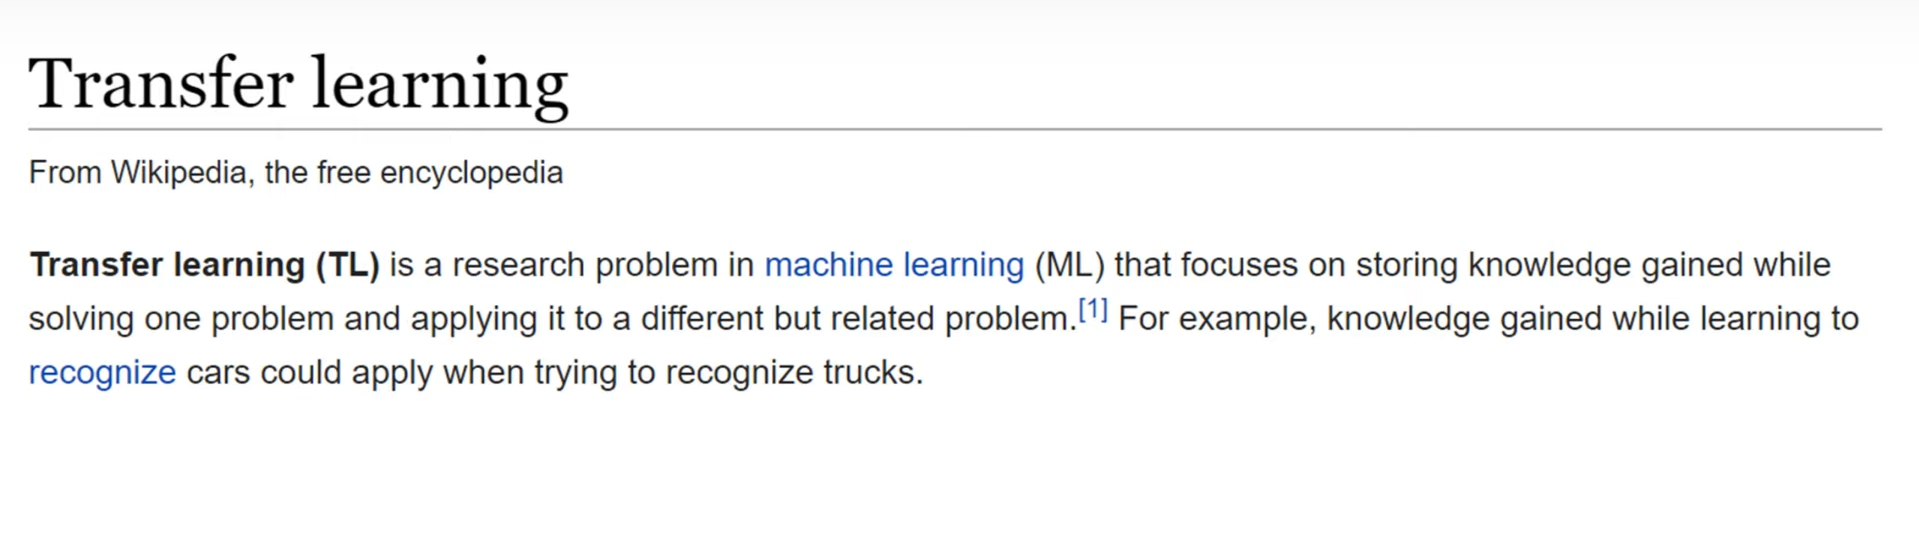

# In this we will use Google's pre Trained Model

Mobilenet V2 Model - trained at google 1.4 million images, 1000 classes

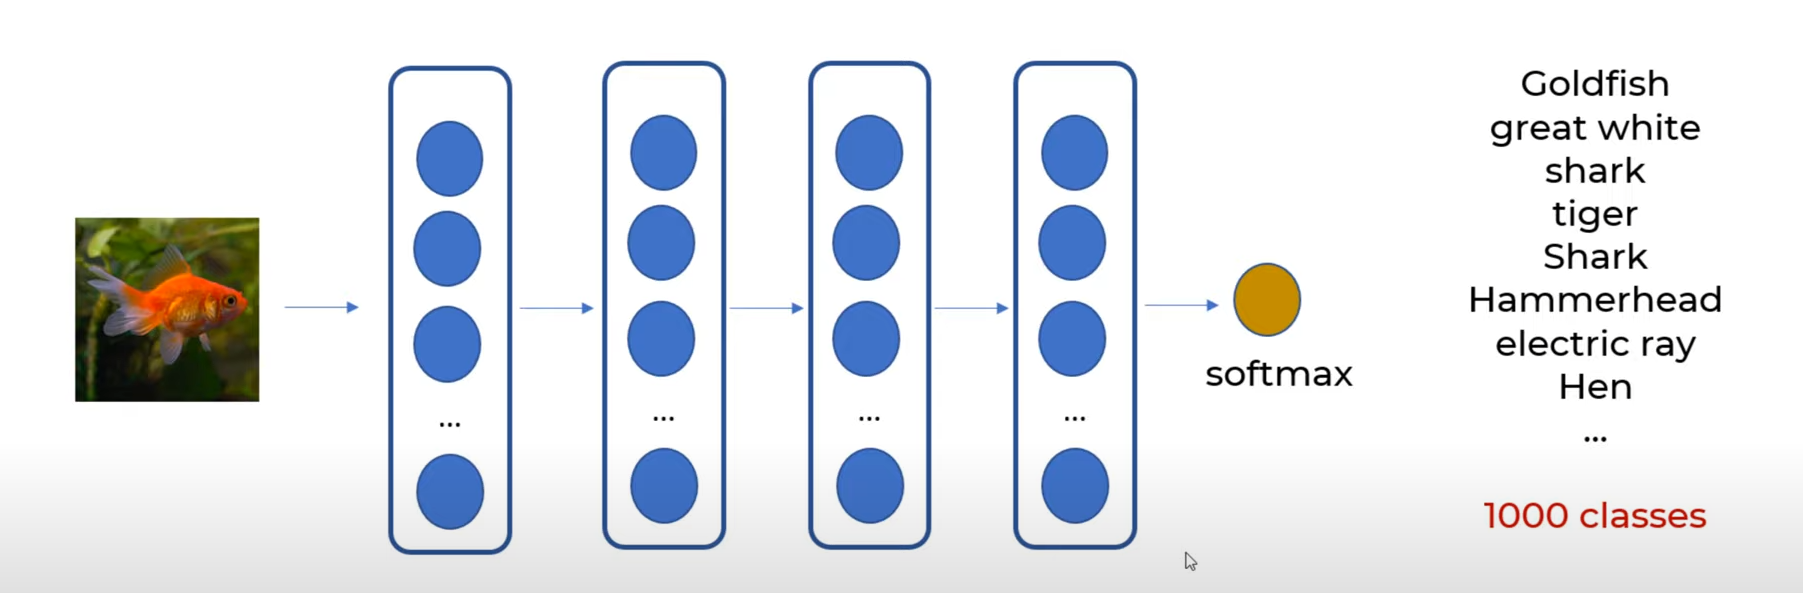

So like what we will do is that in the above image theres a neural network with input layer neural layers hidden layers and output layers so what we will do that we will use **freezing** what this means that it will freeze the output layer then we can use the rest in our owm model with the same features and weights as the real one : example shown below

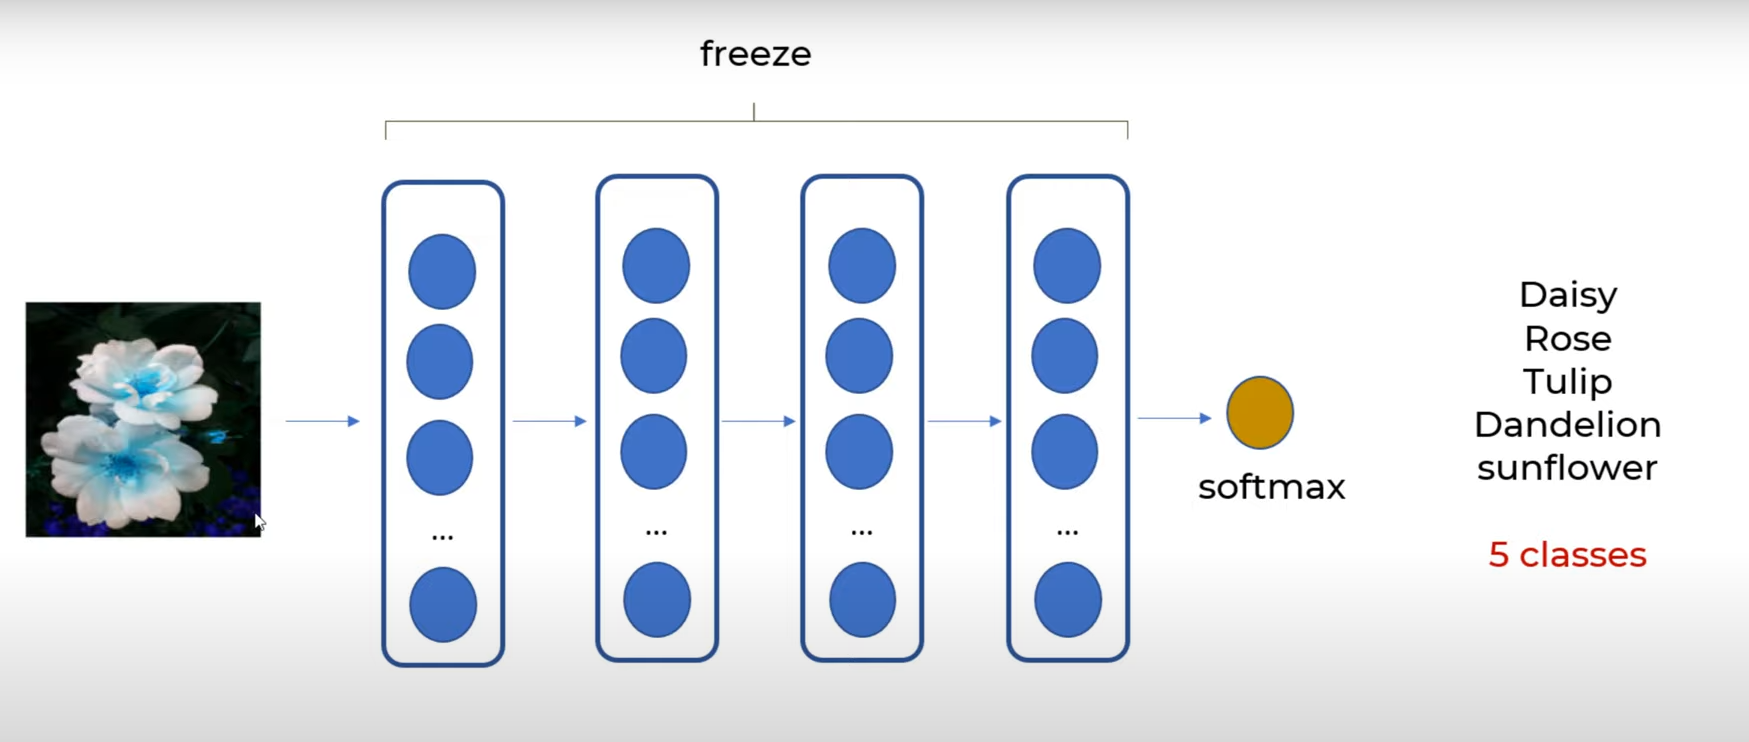

In [35]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import numpy as np
import cv2
import PIL
import matplotlib.pyplot as plt

In [36]:
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

In [37]:
IMAGE_SHAPE = (224,224)
classifier = keras.Sequential([
    hub.KerasLayer(mobilenet_v2,input_shape=IMAGE_SHAPE+(3,))
])

In [38]:
IMAGE_SHAPE+(3,) # It will just make it 224 224 by 3

(224, 224, 3)

Your model is ready and if you want to check that 1000 classes that have then

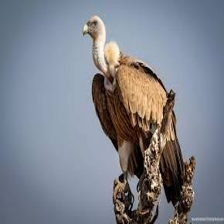

In [39]:
vulture = PIL.Image.open("3.4 vulture.jpeg").resize(IMAGE_SHAPE)
vulture

In [40]:
vulture = np.array(vulture)/255
vulture.shape

(224, 224, 3)

In [41]:
vulture

array([[[0.3372549 , 0.40392157, 0.46666667],
        [0.3372549 , 0.40392157, 0.46666667],
        [0.34117647, 0.40784314, 0.47058824],
        ...,
        [0.35294118, 0.41568627, 0.50588235],
        [0.35294118, 0.41568627, 0.50588235],
        [0.35294118, 0.41568627, 0.50588235]],

       [[0.3372549 , 0.40392157, 0.46666667],
        [0.3372549 , 0.40392157, 0.46666667],
        [0.34117647, 0.40784314, 0.47058824],
        ...,
        [0.35294118, 0.41568627, 0.50588235],
        [0.35294118, 0.41568627, 0.50588235],
        [0.35294118, 0.41568627, 0.50588235]],

       [[0.3372549 , 0.40392157, 0.46666667],
        [0.3372549 , 0.40392157, 0.46666667],
        [0.34117647, 0.40784314, 0.47058824],
        ...,
        [0.35294118, 0.41568627, 0.50588235],
        [0.35294118, 0.41568627, 0.50588235],
        [0.35294118, 0.41568627, 0.50588235]],

       ...,

       [[0.34901961, 0.38431373, 0.45098039],
        [0.34901961, 0.38431373, 0.45098039],
        [0.34901961, 0

In [42]:
vulture[np.newaxis,...].shape

(1, 224, 224, 3)

The expression `vulture[np.newaxis, ...].shape` is used in NumPy to **add a new dimension** at the beginning of the array `vulture`.

### Explanation:

* `vulture` is assumed to be a NumPy array.
* `np.newaxis` is a way to increase the dimensions of an existing array by one.
* `...` (ellipsis) means "all the remaining dimensions".

### Example:

If `vulture` has shape `(224, 224, 3)`, which is typical for an image:

```python
import numpy as np

vulture = np.zeros((224, 224, 3))  # Example array
print(vulture.shape)               # Output: (224, 224, 3)

new_shape = vulture[np.newaxis, ...].shape
print(new_shape)                   # Output: (1, 224, 224, 3)
```

### Use Case:

Adding a batch dimension — e.g., to convert a single image to a batch of size 1 for model input.


In [43]:
result = classifier.predict(vulture[np.newaxis,...])
result

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000001C8633F3310>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000001C8633F3310>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000001C8633F3310>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 628ms/step


array([[ 0.31305316,  0.8346595 ,  0.37152642, ...,  1.0634264 ,
         0.14182809, -0.83740664]], dtype=float32)

In [44]:
result.shape

(1, 1001)

In [45]:
np.argmax(result)

24

In [46]:
image_labels = []
with open("3.4 ImageNetLabels.txt")as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [47]:
image_labels[24]

'vulture'

# Now we want to do the classification on our flowers dataset

In [48]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos",origin=dataset_url,cache_dir=".",untar=True)

In [49]:
data_dir

'.\\datasets\\flower_photos'

In [50]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [51]:
image_count = len(list(data_dir.glob('*/*jpg')))
image_count

3670

In [52]:
flower_image_dict = {
    "daisy": list(data_dir.glob('daisy/*')),
     'dandelion':list(data_dir.glob('dandelion/*')),
     'roses':list(data_dir.glob('roses/*')),
     'sunflowers':list(data_dir.glob('sunflowers/*')),
     'tulips':list(data_dir.glob('tulips/*')),
}

flower_label_dict = {
        "daisy": 0,
     'dandelion':1,
     'roses':2,
     'sunflowers':3,
     'tulips':4,
}

In [53]:
img = cv2.imread(str(flower_image_dict['roses'][0]))
img.shape

(240, 179, 3)

In [54]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [62]:
X = []
y = []

for flower_name, images in flower_image_dict.items():
    for image in images:    
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flower_label_dict[flower_name])

In [63]:
X = np.array(X)
y = np.array(y)

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [65]:
len(X_train), len(X_test)

(2752, 918)

In [66]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255


Now our data is ready to use in the ready made model so lets try it

(-0.5, 223.5, 223.5, -0.5)

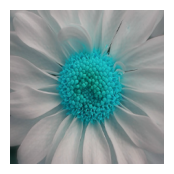

In [78]:
plt.figure(figsize=(2,2))
plt.imshow(X[0])
plt.axis("off")

(-0.5, 223.5, 223.5, -0.5)

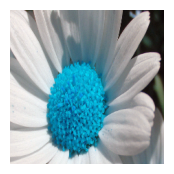

In [79]:
plt.figure(figsize=(2,2))
plt.imshow(X[1])
plt.axis("off")

(-0.5, 223.5, 223.5, -0.5)

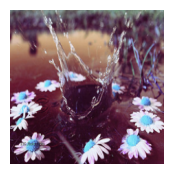

In [80]:
plt.figure(figsize=(2,2))
plt.imshow(X[2])
plt.axis("off")

In [69]:
pred = classifier.predict(np.array([X[0],X[1],X[2]]))
pred = np.argmax(pred,axis=1)
pred


1/1 [==============================] - 0s 24ms/step


array([795, 795, 795], dtype=int64)

In [ ]:
image_labels[795] # Its saying that the image we provied is of shower curtain this means that we cant use the raw model with our data

'shower curtain'

# Retraining the model

In [88]:
# mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4" 

##### Here this is same as starting but instead of classification its feature vector which will give you the model except for the last layers

In [93]:
pretrained_model_without_last_layer = hub.KerasLayer(
    feature_extractor_model,input_shape=IMAGE_SHAPE+(3,),trainable=False
)

Here trainable means freeze
this means it wont train the model so the training weights and everything remains same as real
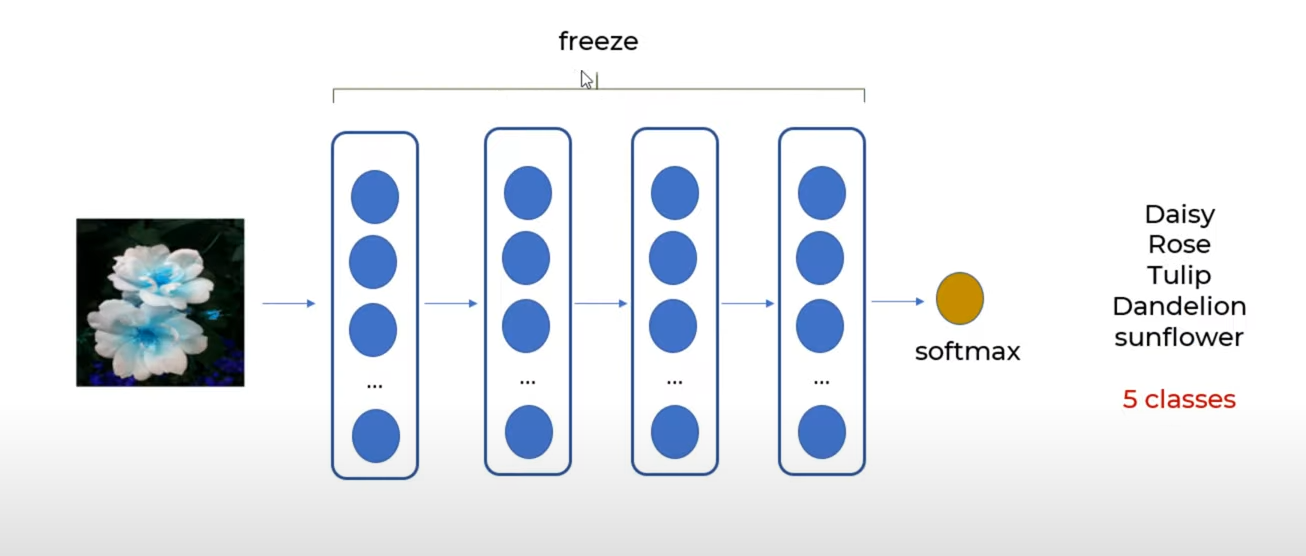
And when you perform training all the layers will have thier fixed weight

In [ ]:
num_of_classes = 5

model = keras.Sequential([
    pretrained_model_without_last_layer,
    keras.layers.Dense(num_of_classes)

])

model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [95]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [98]:
model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 5s 34ms/step - loss: 0.6976 - accuracy: 0.7427
Epoch 2/5
86/86 [==============================] - 3s 33ms/step - loss: 0.3969 - accuracy: 0.8536
Epoch 3/5
86/86 [==============================] - 3s 33ms/step - loss: 0.3186 - accuracy: 0.8895
Epoch 4/5
86/86 [==============================] - 3s 33ms/step - loss: 0.2706 - accuracy: 0.9062
Epoch 5/5
86/86 [==============================] - 3s 32ms/step - loss: 0.2374 - accuracy: 0.9201


In [99]:
model.evaluate(X_test_scaled,y_test)

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x000001C87888AEE0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x000001C87888AEE0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x000001C87888AEE0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
29/29 [==============================] - 2s 35ms/step - loss: 0.3821 - accuracy: 0.8638


[0.3820517361164093, 0.8638344407081604]


---

# 🧠 Overview Table (Quick Glance)

| Task                     | What it does                                   | Output Format                        |
| ------------------------ | ---------------------------------------------- | ------------------------------------ |
| **Image Classification** | Says **what** is in the image                  | Label: e.g., `"cat"`                 |
| **Object Detection**     | Says **what and where** (bounding box + label) | Label + Box: `"cat" at (x, y, w, h)` |
| **Image Segmentation**   | Says **what, where, and which pixels**         | Label **per pixel** (mask/image)     |

---

## 🖼️ 1. **Image Classification**

### 👶 What is it?

> Just **tell me what is in the picture** — one answer only.

👁️ The model looks at the entire image and says:

> “I think this is a **dog**.”

### 🧪 Example:

You give it this:

```
[ 🐶 picture ]
```

Model says:

```
Label: "Dog"
```

### ✅ Use Cases:

* Spam image detection
* X-ray: “Is this normal or not?”
* Animal or plant identification

---

## 🎯 2. **Object Detection**

### 👶 What is it?

> Find **what’s in the picture and where it is** (draw a box around it).

👁️ The model says:

> “There’s a **dog here**, and a **ball over there**.”

It gives:

* Labels
* Bounding box coordinates: (x, y, width, height)

### 🧪 Example:

You give it:

```
[ 🐶     ⚽ ]
```

Model says:

* Dog at (40, 30, 100, 120)
* Ball at (200, 90, 60, 60)

### ✅ Use Cases:

* Self-driving cars (detect cars, people, stop signs)
* Surveillance (detect weapons, people)
* Retail checkout automation

---

## 🧩 3. **Image Segmentation**

### 👶 What is it?

> Tell me **which pixel** belongs to **which object**.

👁️ The model colors each pixel:

> “This pixel is part of the cat, this pixel is background, this is road…”

Two types:

| Type                      | Meaning                                    |
| ------------------------- | ------------------------------------------ |
| **Semantic Segmentation** | Group pixels by **class** (e.g., all cats) |
| **Instance Segmentation** | Separate **each object individually**      |

### 🧪 Example:

You give it:

```
[ 🐶 🐱 ]
```

It outputs a **colored mask**:

* All dog pixels = red
* All cat pixels = blue

### ✅ Use Cases:

* Medical imaging (highlight tumor pixels)
* Satellite image analysis (roads, forests, rivers)
* Augmented reality apps

---

# 🎯 Summary Table

| Feature           | Classification  | Detection               | Segmentation               |
| ----------------- | --------------- | ----------------------- | -------------------------- |
| Output            | Label only      | Boxes + Labels          | Mask per pixel             |
| How many objects? | One main object | Multiple                | All + pixels               |
| Knows **where**?  | ❌ No            | ✅ Yes (box)             | ✅ Yes (pixel-perfect)      |
| Most precise?     | ❌               | ❌                       | ✅                          |
| Model examples    | MobileNet, VGG  | YOLO, SSD, Faster R-CNN | U-Net, DeepLab, Mask R-CNN |

---

# 👁️ Visual Summary

### 🖼️ Image Classification

```
Input: [ 🐶 🐱 ] → Output: "Dog"
```

### 🎯 Object Detection

```
Input: [ 🐶 🐱 ] → Output: "Dog at (x1, y1)", "Cat at (x2, y2)"
```

### 🧩 Image Segmentation

```
Input: [ 🐶 🐱 ] → Output: Pixel map with 🐶 pixels in red, 🐱 pixels in blue
```

---

# 🧠 Real-Life Analogy: Books on a Shelf 📚

| Task               | Like asking…                                                                   |
| ------------------ | ------------------------------------------------------------------------------ |
| Classification     | “Is this a **science book**?”                                                  |
| Object Detection   | “Where are the **science books** on this shelf?” (bounding boxes)              |
| Image Segmentation | “Which exact **pages and covers** are part of each science book?” (pixel-wise) |

---


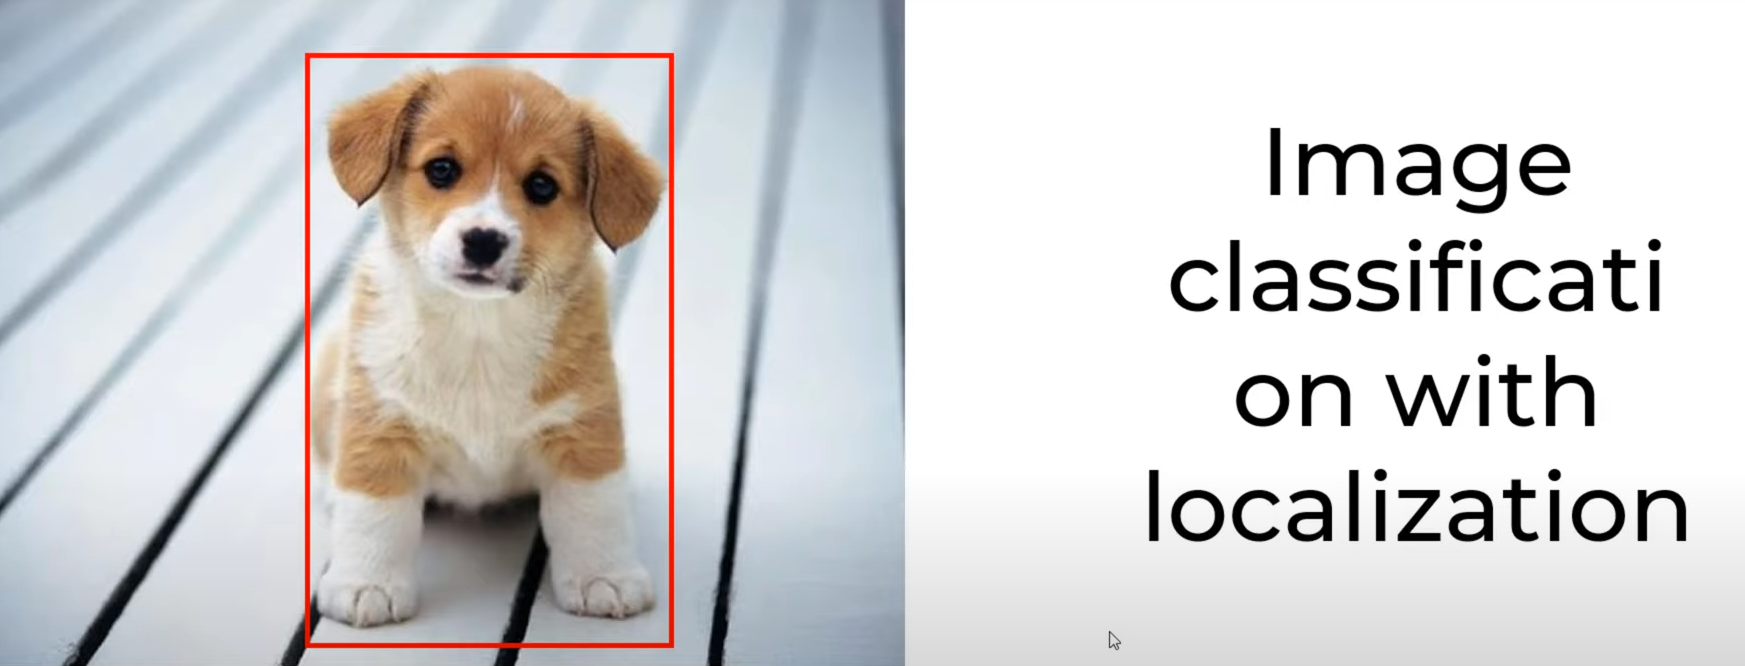
# Image classification with location also

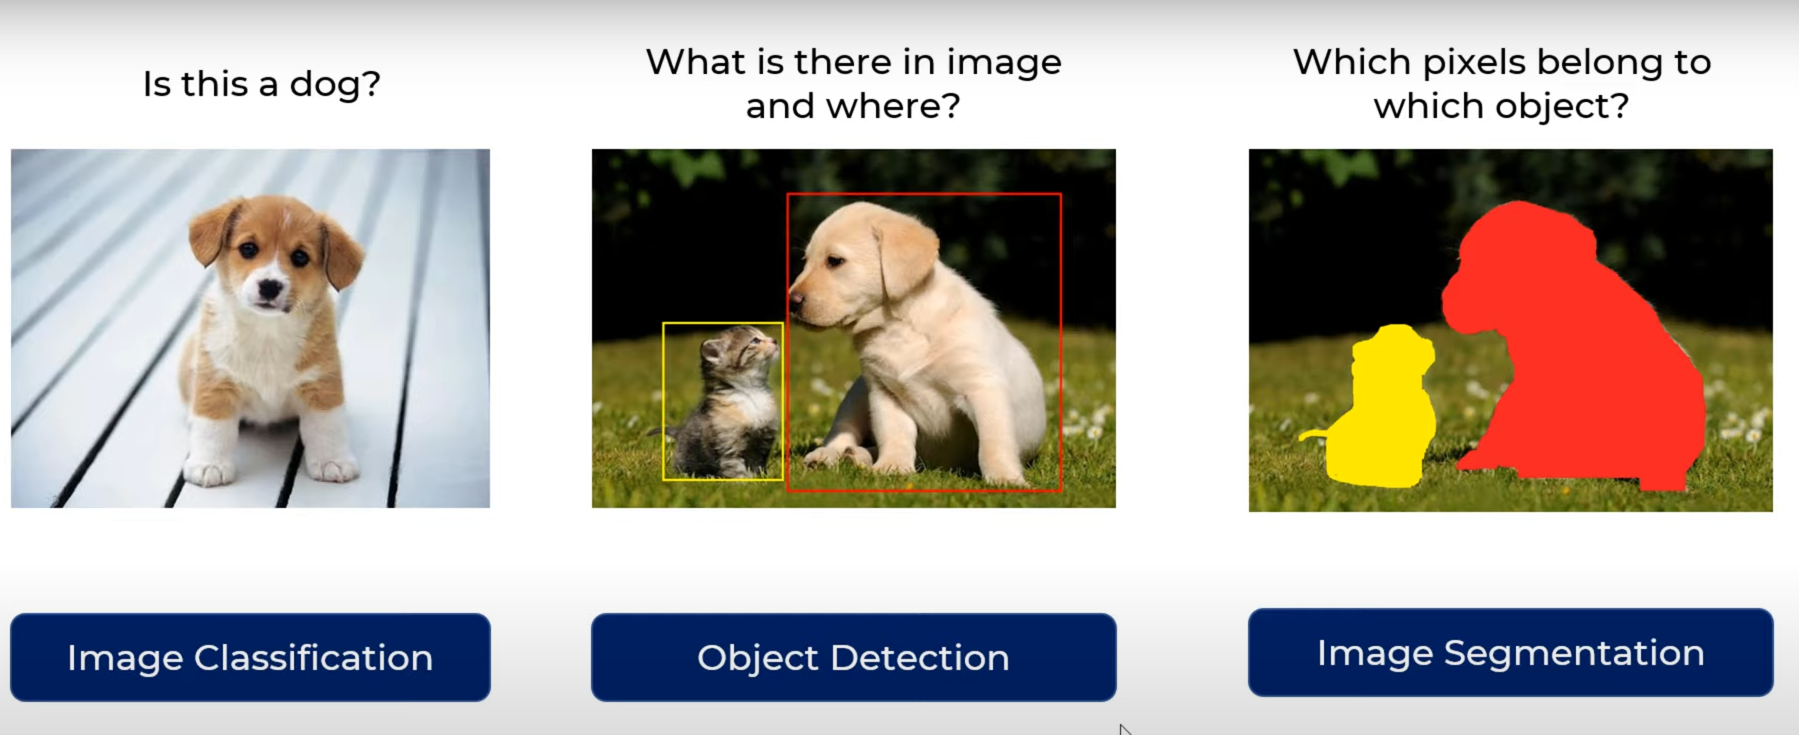



> 👶 Like you're 5 years old
> ⚛️ With no atom left undefined

---

# 🧠 What is YOLO? > 🎯 **YOLO** – You Only Look Once

---

## 👶 Baby Definition:

> YOLO is a model that looks at an image **just once** and says:
> “There’s a dog here 🐶, a cat there 🐱, and a ball over there ⚽.”

✅ It **finds objects** AND **draws boxes** around them in **one single shot**.

---

## 💥 The YOLO Idea

Instead of:

* First **looking** at parts of the image (like R-CNN does)
* Then **classifying each part separately**

👉 YOLO says:

> “Let’s look at the whole image just **once**, and predict **all objects** at once.”

---

## 🚀 Why YOLO is Famous

| Feature      | Why It Rocks 🤘                   |
| ------------ | --------------------------------- |
| Super Fast ⚡ | Real-time detection (\~30–60 FPS) |
| All-in-One   | Finds object **location + class** |
| End-to-End   | No separate region proposal stage |

---

# 🧱 How YOLO Works (Step-by-Step, Lego Style 🧱)

---

## 🔲 1. Divide Image into a Grid

Imagine a 416x416 image.

YOLO breaks it into a grid — like a chessboard.

Example:

* A **13×13** grid
* Each cell is responsible for **detecting objects** that are **centered in that cell**

---

## 🎯 2. Each Grid Cell Predicts:

For **each bounding box** (YOLO usually uses 3-5 boxes per cell), the model predicts:

```
[ x, y, w, h, objectness, class probabilities ]
```

| Value         | Meaning                            |
| ------------- | ---------------------------------- |
| `x`, `y`      | center of box (relative to cell)   |
| `w`, `h`      | width & height of box (normalized) |
| `objectness`  | how confident there's an object    |
| `class_probs` | how likely it’s a cat, dog, etc.   |

---

## 🔄 3. Apply Non-Max Suppression (NMS)

YOLO might predict **many boxes** for the same object.

So it uses **NMS** to:

* Keep the **best box**
* Remove overlapping ones

✅ Final result: one clean box per object.

---

# 🔍 YOLO Output Example

Input image:

```
[ 🐶        🐱      ⚽ ]
```

YOLO output:

* Dog at (x₁, y₁, w₁, h₁), confidence: 0.95
* Cat at (x₂, y₂, w₂, h₂), confidence: 0.90
* Ball at (x₃, y₃, w₃, h₃), confidence: 0.85

---

# 📊 YOLO Model Variants

| Version              | Speed 🏎️      | Accuracy 🎯      | Notes                             |
| -------------------- | -------------- | ---------------- | --------------------------------- |
| YOLOv1               | Fast           | Less accurate    | First version (2016)              |
| YOLOv3               | Balanced       | Good             | Very popular                      |
| YOLOv4               | Fast + Strong  | Excellent        | With tricks like Mish, CSPDarknet |
| YOLOv5 🔥            | Blazing Fast   | Highly accurate  | Easy to use, PyTorch-based        |
| YOLOv7               | SOTA in 2022   | Best accuracy    | Latest strong real-time model     |
| YOLOv8 (Ultralytics) | Easiest to use | Strong, flexible | Multi-task (det, cls, seg)        |

---

## 💻 YOLOv5 Code (Quick Example)

```bash
# Clone Ultralytics YOLOv5
git clone https://github.com/ultralytics/yolov5
cd yolov5

# Install dependencies
pip install -r requirements.txt

# Detect objects in an image
python detect.py --source your_image.jpg
```

That’s it — it draws boxes and labels on the image for you. 📦📍

---

# 🧠 TL;DR Summary

| Feature       | YOLO Means…                               |
| ------------- | ----------------------------------------- |
| Full Name     | You Only Look Once                        |
| Task          | Object Detection                          |
| What it does  | Predicts **what & where** for each object |
| Why it’s cool | Fast, accurate, real-time                 |
| Versions      | YOLOv1 → YOLOv8 (latest: Ultralytics)     |

---

# 👁️ YOLO vs Other Detectors

| Feature  | YOLO                | R-CNN/Faster R-CNN      |
| -------- | ------------------- | ----------------------- |
| Speed    | ⚡ Very Fast         | 🐢 Slower               |
| Accuracy | Slightly lower      | Slightly better in some |
| Use Case | Real-time apps      | Offline/high-accuracy   |
| Workflow | 1 step (end-to-end) | 2 steps (region+class)  |

---

# 🧠 Final Analogy

> YOLO is like a superhero 👀 who looks at the whole scene **just once**, points to every object and says:
> “That’s a dog, that’s a car, that’s a stop sign — done!”

---


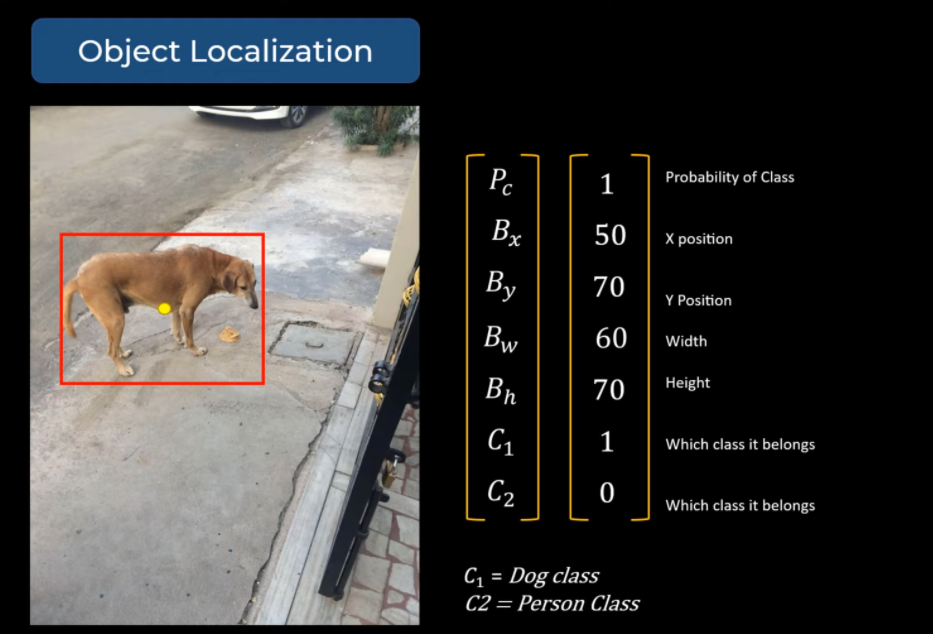

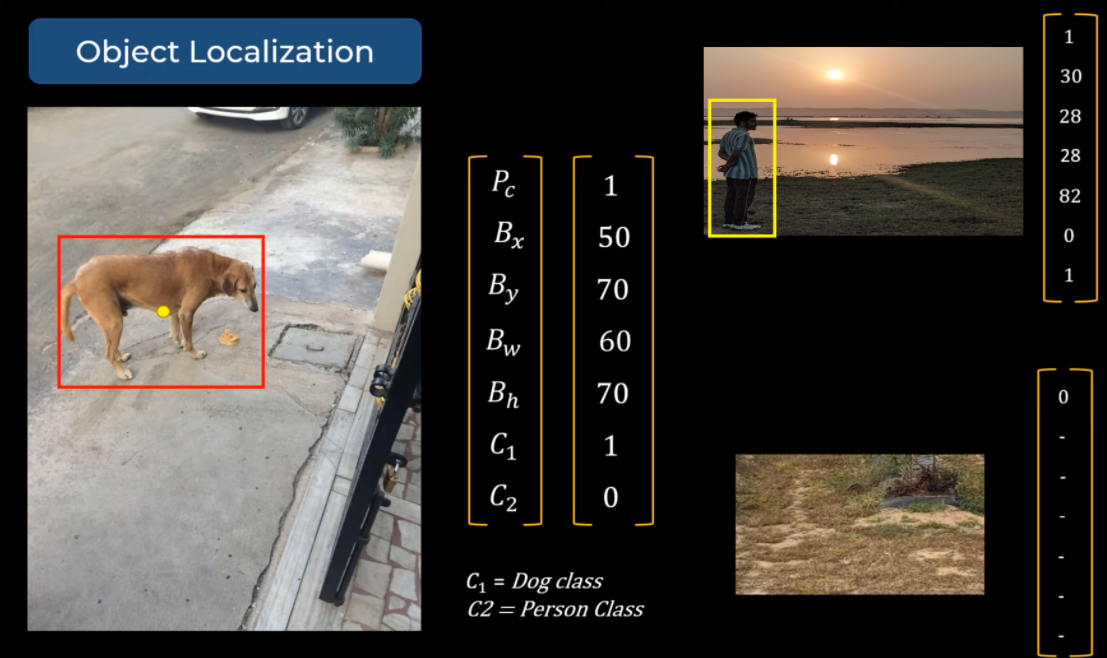

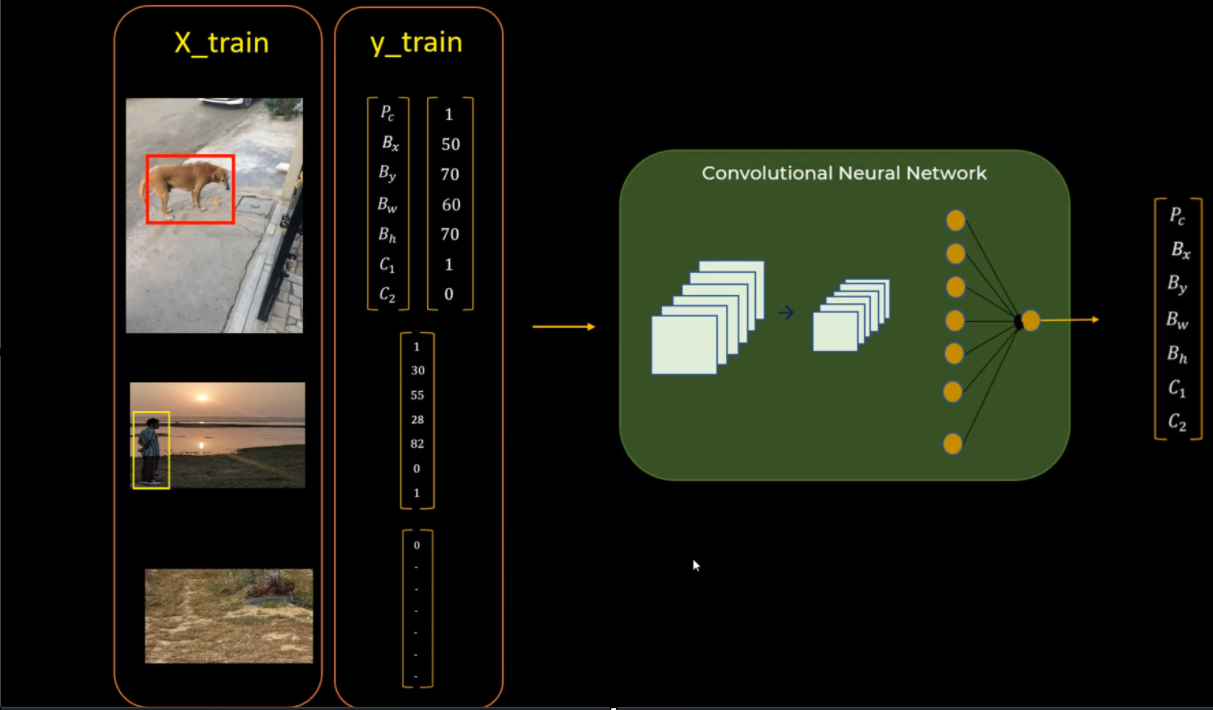

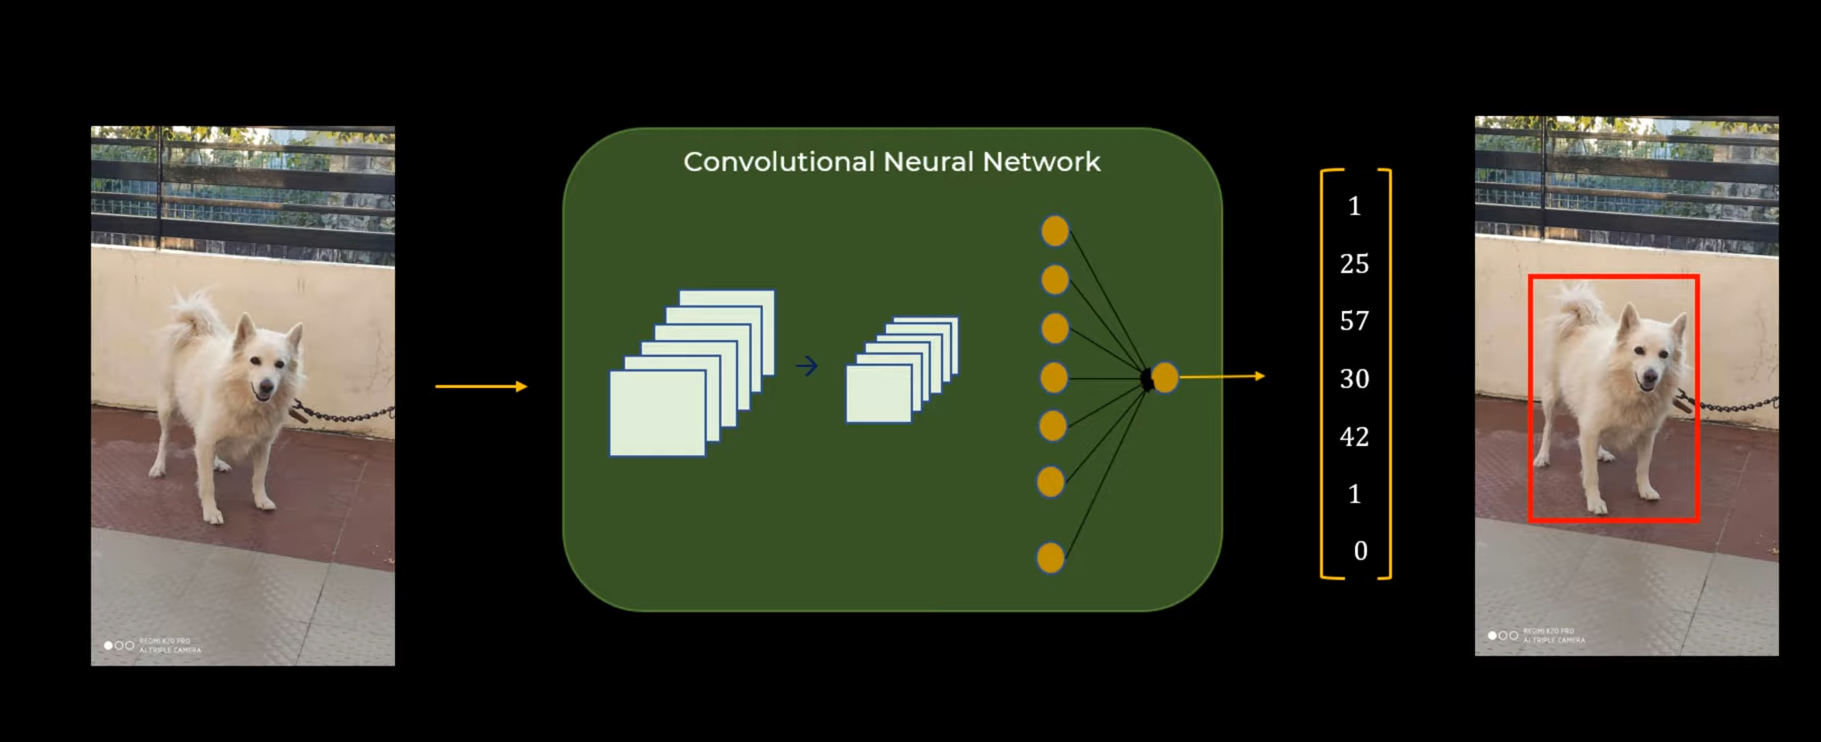

#### Now here this will detect only one object in the image and to solve this problem YOLO algo uses grid operations
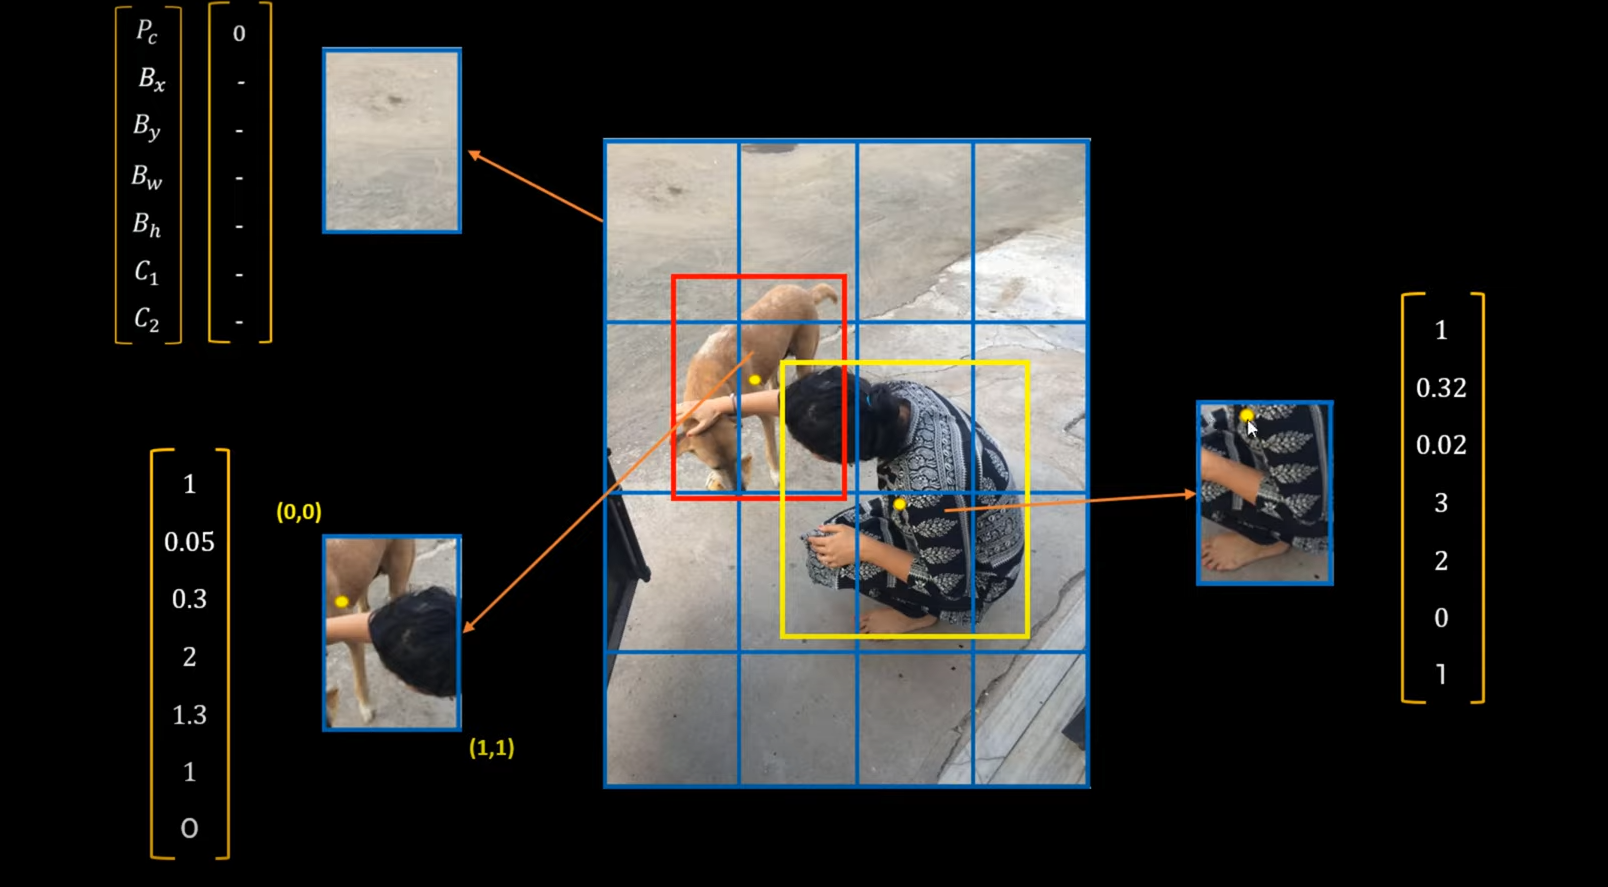
**Here it will try to search the object in grids of a size then it will find the center of that object for recognition**

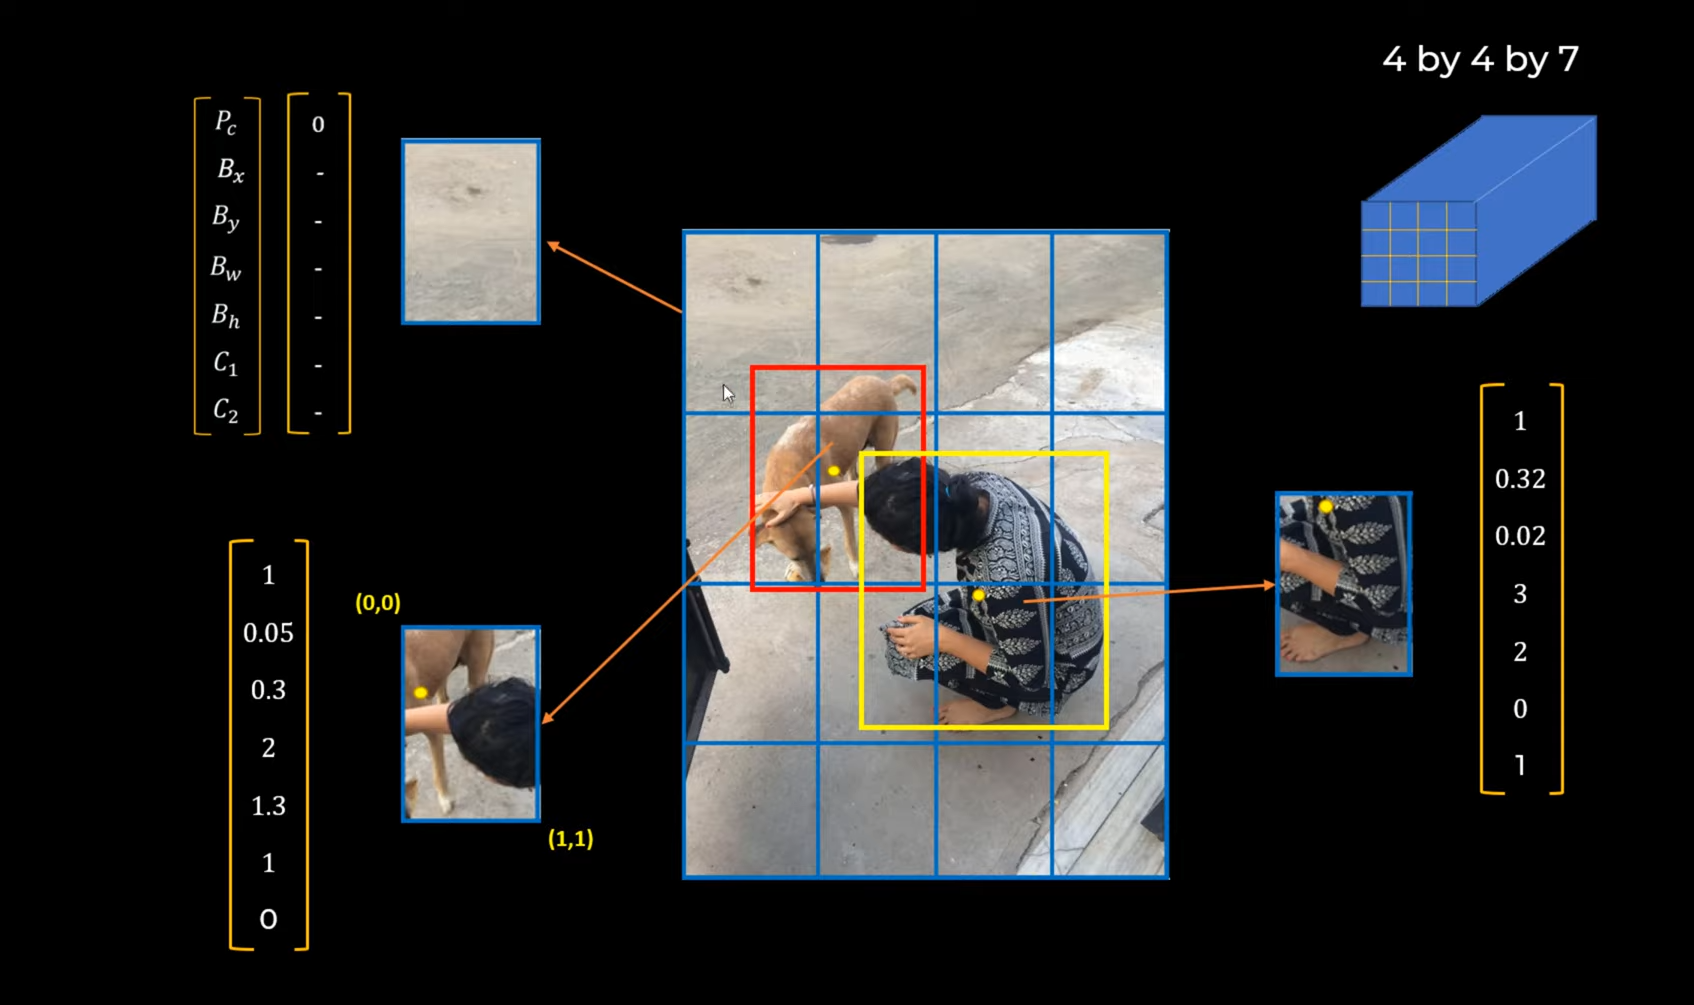
**Now you have an image of grid 4x4 by 7 and it will be like the cuboid shown in the above image **